In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
import torch
import os
print(torch.cuda.is_available()) 

# Cargar el modelo y el procesador
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Verificar si la GPU está disponible y mover el modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Función para generar la descripción de una imagen
def generate_image_description(image):
    inputs = processor(image, return_tensors="pt").to(device)
    outputs = model.generate(**inputs)
    description = processor.decode(outputs[0], skip_special_tokens=True)
    return description

filename='winter-fruit-kefir-salad.jpg'
image_path = os.path.join('D:\\Proyectos\\Docker\\Multimodal_RAG\\RAGer_targaryen\\assets\\recepies\\Food_Images',
                          filename)
image = Image.open(image_path)

In [7]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
import torch
print(torch.cuda.is_available()) 

True


In [8]:
# Cargar el modelo y el procesador
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

In [9]:
# Verificar si la GPU está disponible y mover el modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

In [44]:
# Cargar la imagen de ejemplo
url = "https://www.shutterstock.com/image-photo/three-people-walking-park-getting-260nw-40142764.jpg"  # Reemplaza por la URL o ruta de la imagen
# url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRimQGZ7LbsZEYU4R2MKQD8b9cQhFkObn5qhA&s'
image = Image.open(requests.get(url, stream=True).raw)

In [45]:
# Preparar la imagen para el modelo
inputs = processor(image, return_tensors="pt").to(device)

# Generar la descripción de la imagen
outputs = model.generate(**inputs)
description = processor.decode(outputs[0], skip_special_tokens=True)
print(f"Descripción: {description}")

Descripción: a group of people walking down a path in the park


In [16]:
# Función para generar la descripción de una imagen
def generate_image_description(image):
    inputs = processor(image, return_tensors="pt").to(device)
    outputs = model.generate(**inputs)
    description = processor.decode(outputs[0], skip_special_tokens=True)
    return description

In [13]:
import os

In [14]:
os.path.join('D:\Proyectos\Docker\Multimodal_RAG\RAGer_targaryen\assets\recepies\Food_Images',
                          'amaro-spiked-mocha-with-caramelized-brioche.jpg')

'D:\\Proyectos\\Docker\\Multimodal_RAG\\RAGer_targaryen\x07ssets\recepies\\Food_Images\\amaro-spiked-mocha-with-caramelized-brioche.jpg'

In [38]:
filename='amaro-spiked-mocha-with-caramelized-brioche.jpg'
filename='anchovy-mayonnaise-51242260.jpg'
filename='winter-fruit-kefir-salad.jpg'
image_path = os.path.join('D:\\Proyectos\\Docker\\Multimodal_RAG\\RAGer_targaryen\\assets\\recepies\\Food_Images',
                          filename)
image = Image.open(image_path)

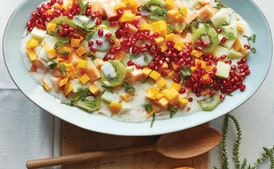

In [39]:
image

In [21]:
# Generar descripción
description = generate_image_description(image)
print(f"Descripción de {filename}: {description}")

d:\Proyectos\Docker\Multimodal_RAG\amb_mm_rag\Lib\site-packages\transformers\generation\utils.py:1220: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Descripción de amaro-spiked-mocha-with-caramelized-brioche.jpg: a white plate topped with two small cups filled with chocolate covered chocolate covered pres


In [40]:
# Función para generar la descripción de una imagen
def generate_image_description(image, max_length=150, num_beams=5, temperature=1.0, top_p=0.9):
    inputs = processor(image, return_tensors="pt").to(device)
    
    # Generar la descripción con parámetros ajustados
    outputs = model.generate(
        **inputs,
        max_length=max_length,           # Incrementa la longitud máxima
        num_beams=num_beams,             # Beam search para exploración más detallada
        temperature=temperature,         # Controla la creatividad
        top_p=top_p,                     # Nucleus sampling para generar texto más variado
        repetition_penalty=1.2           # Penaliza la repetición de palabras
    )
    
    description = processor.decode(outputs[0], skip_special_tokens=True)
    return description

In [41]:
description = generate_image_description(image, max_length=50, num_beams=12)
print(f"Descripción de {filename}: {description}")

d:\Proyectos\Docker\Multimodal_RAG\amb_mm_rag\Lib\site-packages\transformers\generation\configuration_utils.py:606: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


Descripción de winter-fruit-kefir-salad.jpg: a bowl filled with fruit and vegetables on top of a wooden cutting board
